<a href="https://colab.research.google.com/github/hardikcode-creator/EDA/blob/main/Linear_regression_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")


In [148]:
df.reset_index(inplace=True)

In [149]:
df.columns=df.iloc[0]

In [156]:
df.head()
df.drop(columns=['index'],inplace=True,axis=1)

In [157]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [158]:
df.loc[:123,"Region"]=0
df.loc[123:,"Region"]=1

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [160]:
df[['Region']]=df[['Region']].astype('int')

In [161]:
df.isnull().sum()

,0
0,
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1


In [162]:
df.dropna(inplace=True)


In [165]:


df.drop(columns=['level_0','index'],axis=1,inplace=True)

In [166]:
#fix empty spaces in columns
df.columns=df.columns.str.strip()

In [169]:
df.head()


,122
0,
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC


In [170]:
df=df.drop(122).reset_index(drop=True)

In [171]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [172]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype('int')

In [173]:
## Changing other columns to float
columns=[col for col in df.columns if df[col].dtype=='O']

In [174]:
columns

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [175]:
for col in columns:
  if col!='Classes':
    df[col]=df[col].astype('float')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [177]:
df.drop(columns=['day','month','year'],inplace=True,axis=1)

In [178]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [181]:
df2=df.copy()
df2['Classes']=df2['Classes'].str.strip()

In [182]:
df2['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [184]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2['Classes']=encoder.fit_transform(df2['Classes'])
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [186]:
df2.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


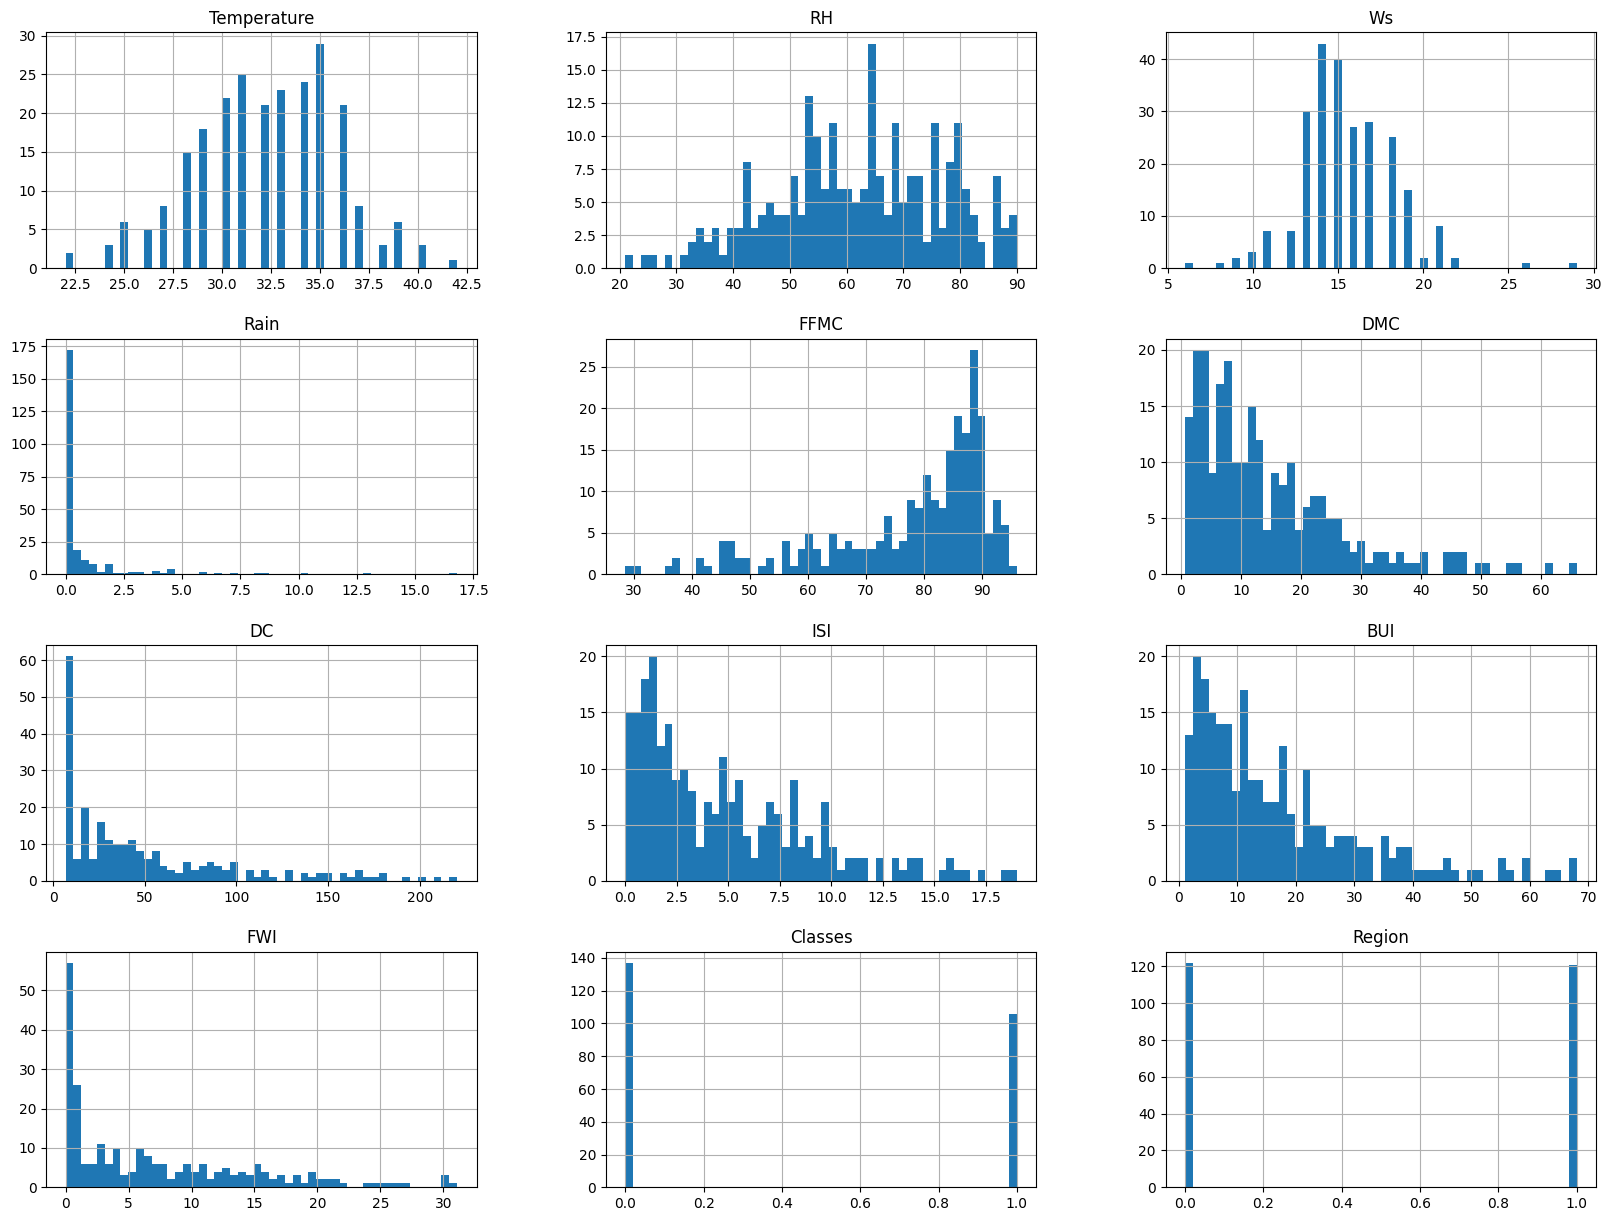

In [188]:

df2.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: xlabel='0', ylabel='0'>

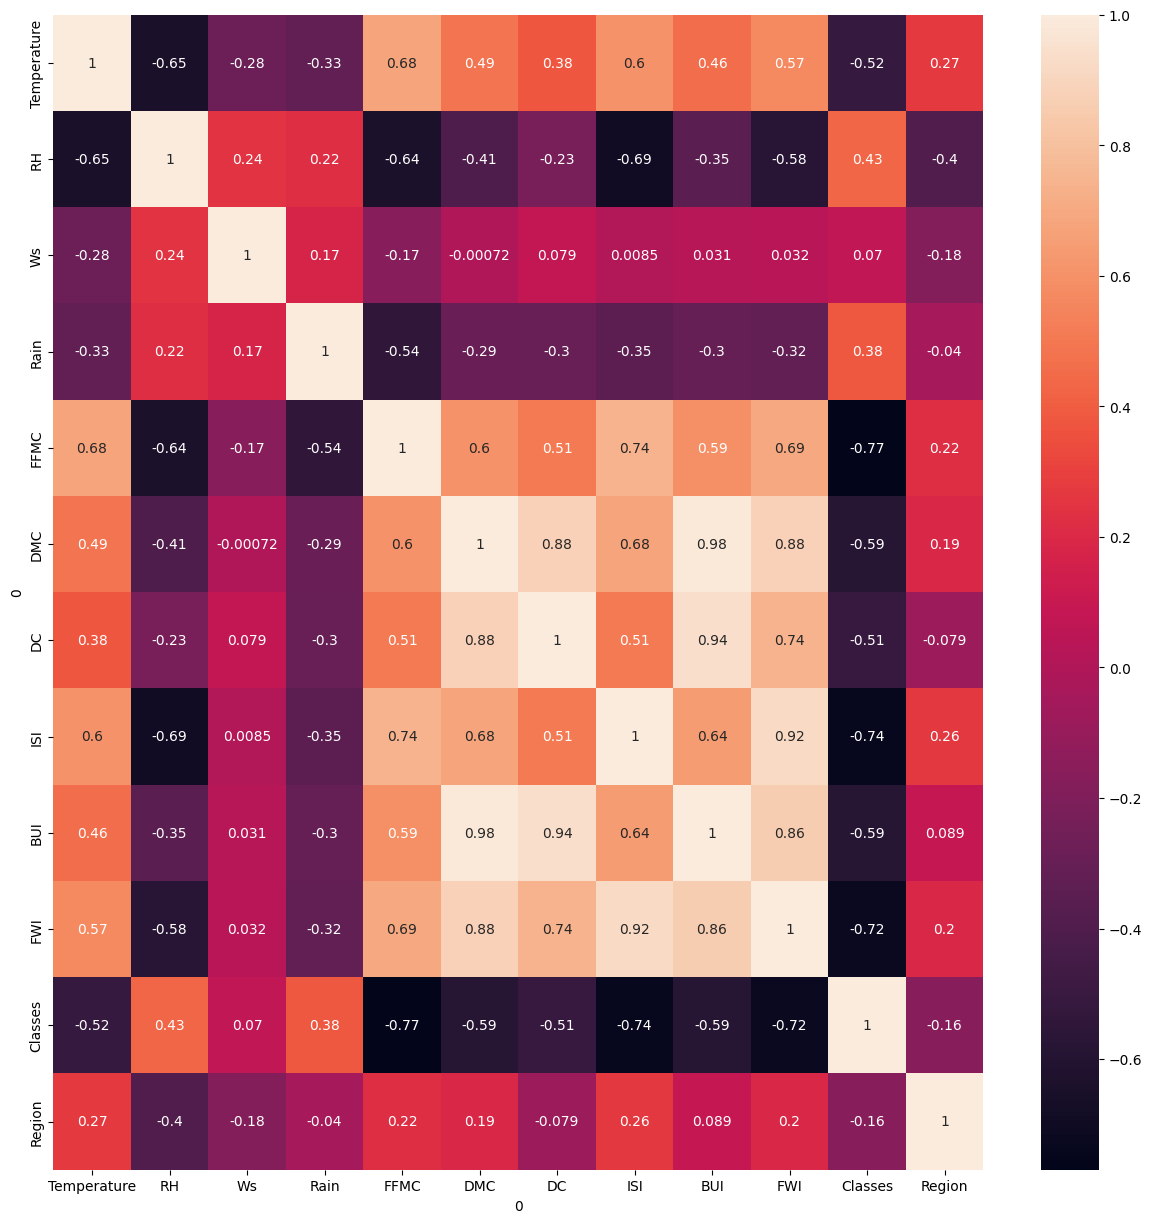

In [194]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True)

In [196]:
df2.to_csv('algerian.csv', index=False)

In [201]:
X=df2.drop(columns=['FWI'],axis=1)
y=df2['FWI']


In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [203]:
# We will drop the columns which are highly coorelated
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,,,,,,,,,,,
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,-0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,-0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,-0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,-0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,-0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,-0.602102,0.090326


In [204]:
def coorelation(df,threshold=0.85):
  corr_set=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        corr_set.add(colname)
  return corr_set

cols=coorelation(X_train)

In [205]:
cols

{'BUI', 'DC'}

In [206]:
X_train.drop(columns=cols,axis=1,inplace=True)
X_test.drop(columns=cols,axis=1,inplace=True)


In [207]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [209]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print(r2_score(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))

0.9805895859259882
0.5049978694165687
0.5882990110708693


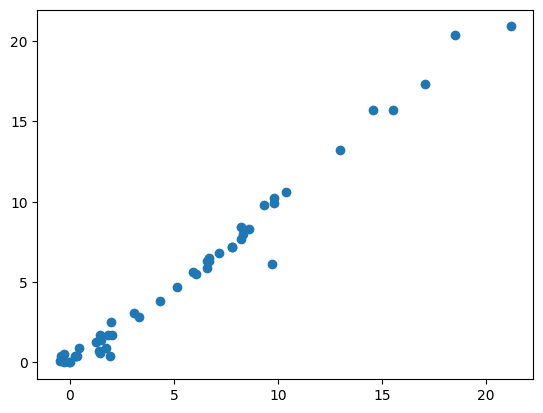

In [213]:

plt.scatter(y_pred,Y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [214]:
# Lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train,Y_train)
y_pred=lasso.predict(X_test)
print(r2_score(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))

0.9430507350726562
1.0093958923873407


In [215]:
# cross validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lasso=LassoCV(cv=5)
lasso.fit(X_train,Y_train)
y_pred=lasso.predict(X_test)
print(r2_score(Y_test,y_pred))


0.978328234520343
